## Basic Function Initialization

In [1]:
from pylab import *
import scipy.signal as signal

#Plot frequency and phase response
def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    subplot(211)
    plot(w/max(w),h_dB)
    ylim(-150, 5)
    ylabel('Magnitude (db)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Frequency response')
    subplot(212)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/max(w),h_Phase)
    ylabel('Phase (radians)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Phase response')
    subplots_adjust(hspace=0.5)

#Plot step and impulse response
def impz(b,a=1):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = signal.lfilter(b,a,impulse)
    subplot(211)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Step response')
    subplots_adjust(hspace=0.5)

##Lowpass FIR Filter

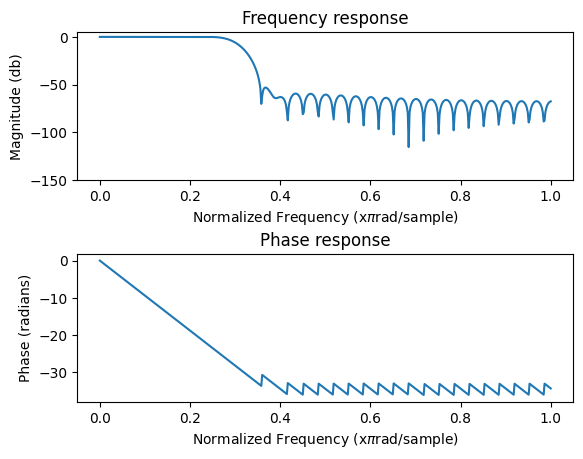

In [2]:
n = 61
a = signal.firwin(n, cutoff = 0.3, window = "hamming")
#Frequency and phase response
mfreqz(a)

In [3]:
show()
#Impulse and step response
figure(2)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

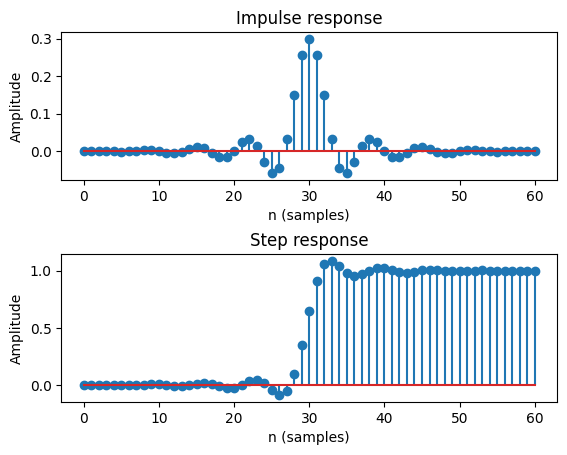

In [4]:
impz(a)

In [5]:
show()

##Highpass FIR Filter

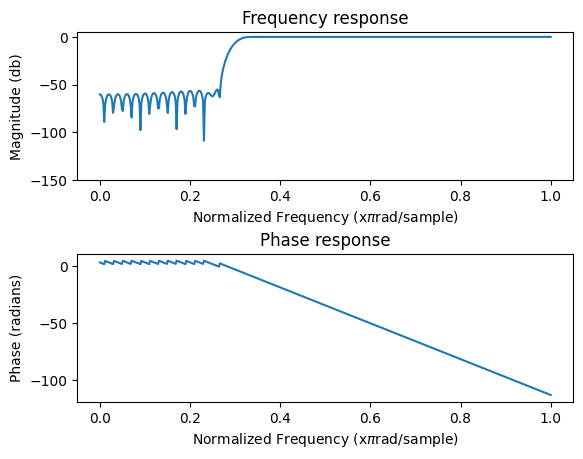

In [7]:
n = 101
a = signal.firwin(n, cutoff = 0.3, window = "hamming", pass_zero=False)
mfreqz(a)
show()

##Bandpass FIR Filter

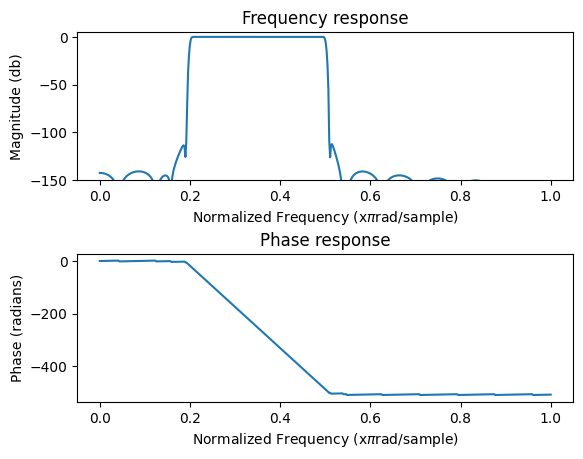

In [8]:
n = 1001
a = signal.firwin(n, cutoff = [0.2, 0.5], window = 'blackmanharris', pass_zero = False)
mfreqz(a)
show()